<a href="https://colab.research.google.com/github/JJuwan/2025-1-myclass-BDA/blob/main/inclass/10w_B_wed_0507_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
!pip install koreanize_matplotlib


In [99]:
%config inlineBackend.figure_format = 'retina'

In [100]:
pd.set_option('display.precision', 2)

In [101]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [102]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [103]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [104]:
mpg.isna().sum().sum()

np.int64(0)

In [105]:
plt.rcParams.update({'figure.dpi' : '100'})
plt.rcParams.update({'figure.figsize' : [4, 2.5]})

In [106]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


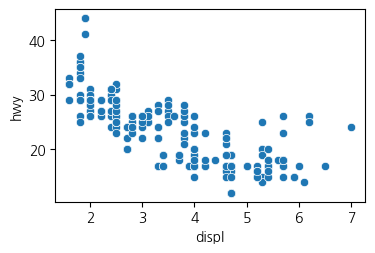

In [107]:
import koreanize_matplotlib

sns.scatterplot(data=mpg, x = 'displ', y = 'hwy');

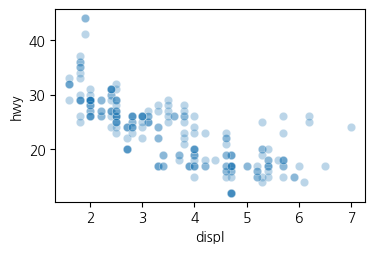

In [108]:
sns.scatterplot(data=mpg, x = 'displ', y = 'hwy', alpha = 0.3);

<Axes: xlabel='displ', ylabel='hwy'>

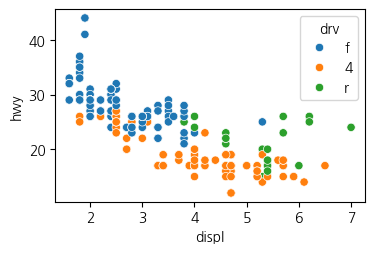

In [109]:
sns.scatterplot(data=mpg, x = 'displ', y = 'hwy', hue = 'drv')

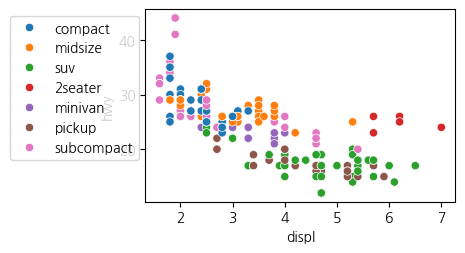

In [110]:
sns.scatterplot(data=mpg, x = 'displ', y = 'hwy', hue = 'category');
plt.legend(loc='upper right', bbox_to_anchor=(0, 1));

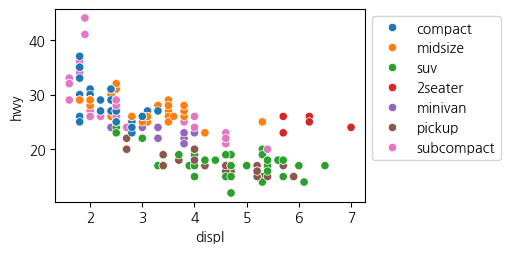

In [111]:
sns.scatterplot(data=mpg, x = 'displ', y = 'hwy', hue = 'category');
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

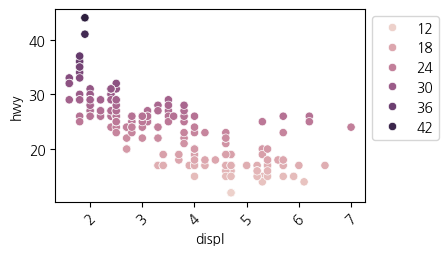

In [112]:
myPlot = sns.scatterplot(data=mpg, x = 'displ', y = 'hwy', hue = 'hwy');
myPlot.tick_params(axis='x', labelrotation=45);
myPlot.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [113]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [114]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


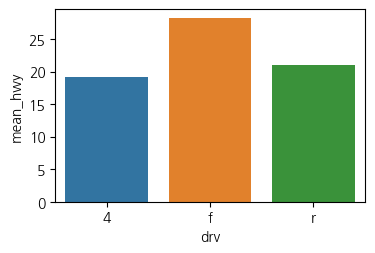

In [115]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv');

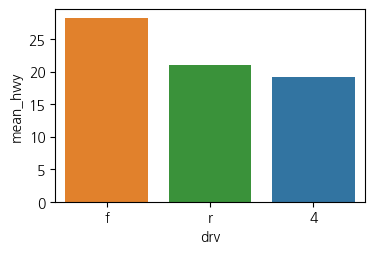

In [116]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv', order = ['f', 'r', '4']);

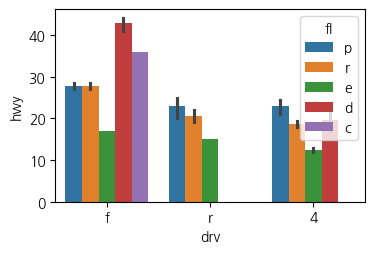

In [117]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'fl', order = ['f', 'r', '4']);

In [118]:
mpg.groupby('drv', as_index=False).count()

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [119]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [120]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns={'model':'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [121]:
mpg.groupby('drv', as_index=False).agg(n = ('model', 'count'))

,drv,n
0,4,103
1,f,106
2,r,25


In [122]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [123]:
df_mpg2 = mpg.groupby('drv', as_index=False).agg(n = ('drv', 'count'))
df_mpg2

,drv,n
0,4,103
1,f,106
2,r,25


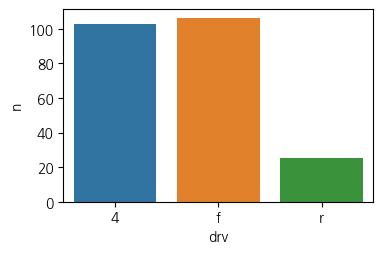

In [124]:
sns.barplot(df_mpg, x = 'drv', y = 'n', hue = 'drv');

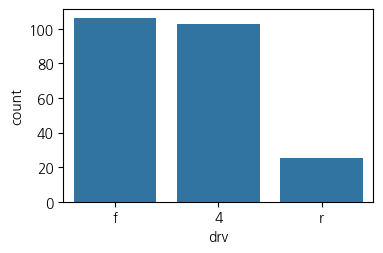

In [125]:
sns.countplot(data=mpg, x = 'drv');

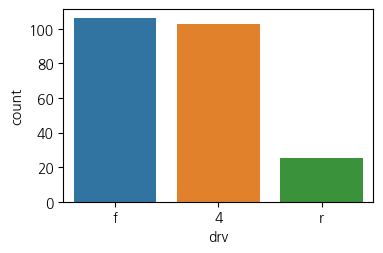

In [126]:
sns.countplot(data=mpg, x = 'drv', hue = 'drv');

In [127]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

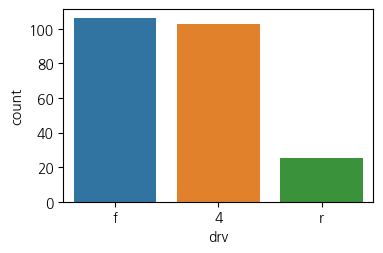

In [128]:
sns.countplot(data=mpg, x = 'drv', hue = 'drv', order = mpg.drv.value_counts().index);

In [132]:
!rm -r data

In [134]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 2.15 MiB | 5.25 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [135]:
eco = pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [136]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


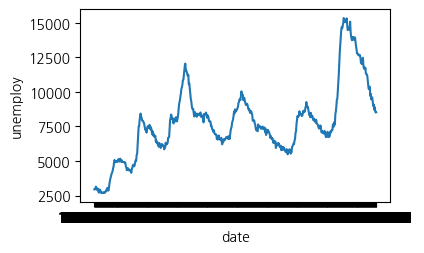

In [137]:
sns.lineplot(data=eco, x = 'date', y = 'unemploy');

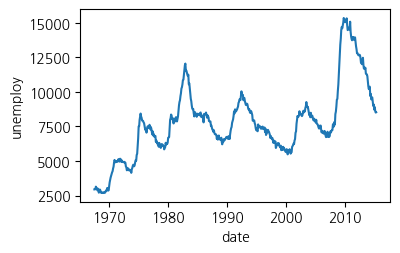

In [138]:
sns.lineplot(data=eco, x = pd.to_datetime(eco['date']), y = 'unemploy');

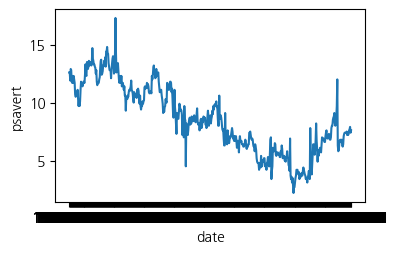

In [139]:
sns.lineplot(data=eco, x = 'date', y = 'psavert');

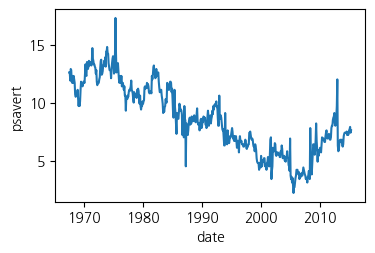

In [140]:
sns.lineplot(data=eco, x = pd.to_datetime(eco['date']), y = 'psavert');

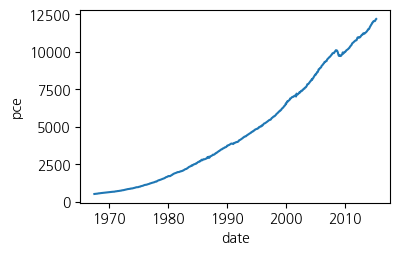

In [141]:
sns.lineplot(data=eco, x = pd.to_datetime(eco['date']), y = 'pce');

In [142]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [144]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [145]:
eco[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [146]:
eco[['date', 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [147]:
eco.date2.dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [149]:
eco['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [150]:
eco['date2'].dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [152]:
eco['date2'].dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [153]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco['day'] = eco['date2'].dt.day

In [155]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


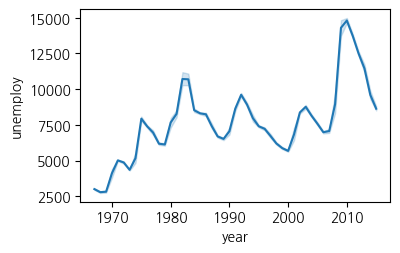

In [156]:
sns.lineplot(data=eco, x = eco['year'], y = 'unemploy');

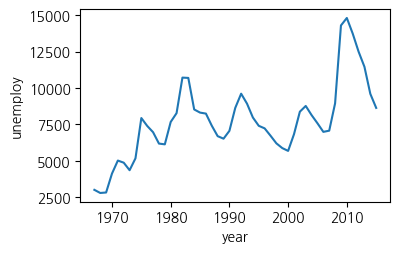

In [160]:
sns.lineplot(data=eco, x = eco['year'], y = 'unemploy', errorbar = None);

<Axes: xlabel='drv', ylabel='hwy'>

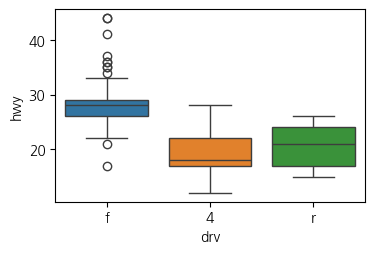

In [161]:
sns.boxplot(mpg, x= 'drv', y = 'hwy', hue = 'drv')

In [168]:
plt.rcParams.update({'figure.figsize': [7, 3]})

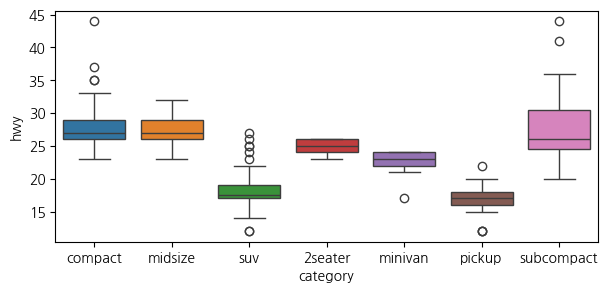

In [166]:
sns.boxplot(mpg, x= 'category', y = 'hwy', hue = 'category');

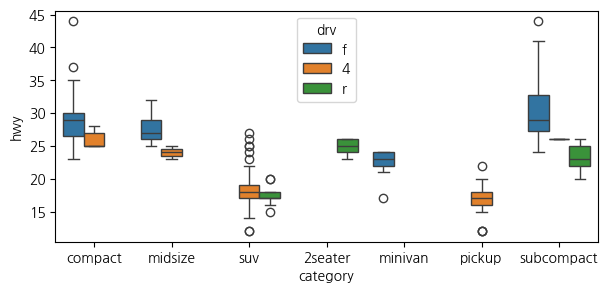

In [169]:
sns.boxplot(mpg, x= 'category', y = 'hwy', hue = 'drv');

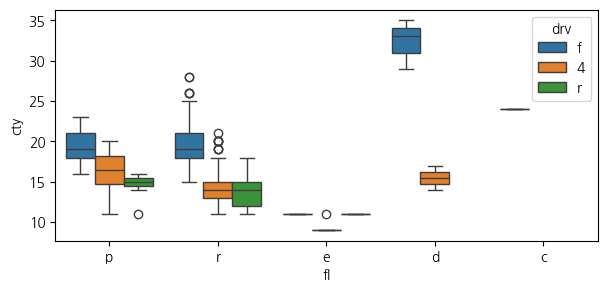

In [170]:
sns.boxplot(mpg, x= 'fl', y = 'cty', hue = 'drv');

In [171]:
mpg.query('fl == "e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [172]:
mpg[(mpg.fl == "e")]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


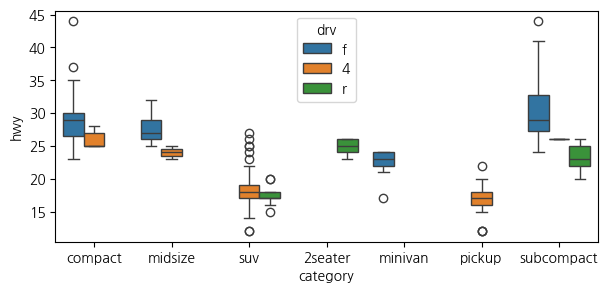

In [173]:
sns.boxplot(mpg, x= 'category', y = 'hwy', hue = 'drv');

In [174]:
plt.rcParams.update({'figure.figsize': [5, 3]})

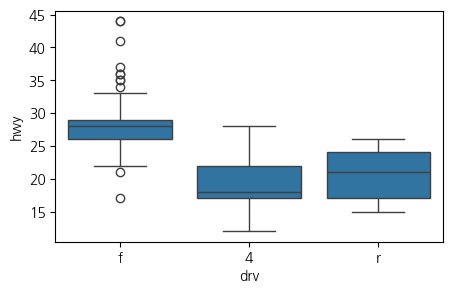

In [175]:
sns.boxplot(mpg, x = 'drv', y = 'hwy');

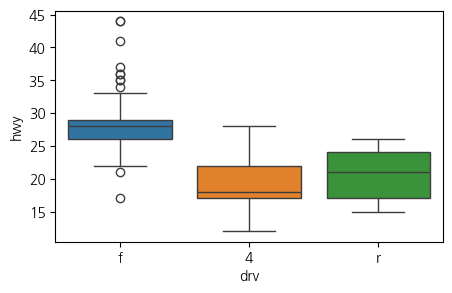

In [176]:
sns.boxplot(mpg, x = 'drv', y = 'hwy', hue = 'drv');

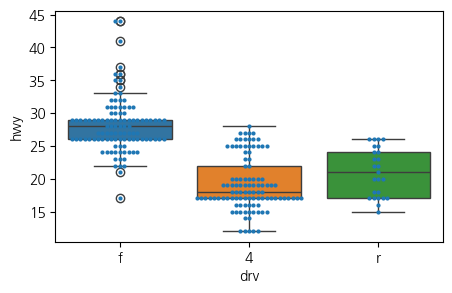

In [177]:
sns.boxplot(mpg, x = 'drv', y = 'hwy', hue = 'drv');
sns.swarmplot(mpg, x = 'drv', y = 'hwy', size=3);

## 08단원 종료